# Assignment 4: Support Vector Machine (SVM) and Model Ensembling {-}

This assignment aims at familiarizing you with training and testing Suppor Vector Machine (SVM) classification model, along with model ensembling methods. The dataset you will be working on is 'data-breast-cancer.csv'. It is composed of attributes to build a prediction model. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the data-breast-cancer.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data. Identify and remove outliers if applicable.  
    1.2 *(1 point)* Train and evaluate an SVM model. Use GridSearchCV to find the best parameters: kernel, C, and gamma values, for the SVM model. Details of the SVM parameters can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.  
    1.3 *(1 point)* Train and evaluate four other classifiers: Logistic Regression, Naive Bayes, Decision Tree and Random Forest. Compare their accuracy, precision, recall, and F1-score with the SVM's performance.  
    1.4 *(2 points)* Apply three ensemble learning techniques: Bagging, Boosting, and Stacking, to solve the problem. Compare their performance against each other as well as against individual models. Summarize your observations and draw conclusions based on the results.

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How well did the SVM model perform compared to the other classifiers? Did it outperform them, or did another model work better?  
    2.2 *(1 point)* How did tuning the C and gamma parameters affect the model’s performance? Did you observe any signs of overfitting or underfitting?  
    2.3 *(1 point)* How could this breast cancer classification model be used in real-world healthcare applications? What challenges might arise in deployment?  
    2.4 *(1 point)* Medical diagnosis models come with ethical responsibilities. What are potential risks of using an automated model for breast cancer detection?  
    2.5 *(1 point)* What was the most insightful part of this assignment? If you could improve your classification result, what would you do differently?  

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment4-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment4 (e.g., ML4DS-2012345-Assigment4) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have data exploration and modeling steps other than the basic requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

In [ ]:
# Load the libraries
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")

In [ ]:
# Show some data samples
df.head()

Unnamed: 0 diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0         M        17.99         10.38          122.80     1001.0   
1           1         M        20.57         17.77          132.90     1326.0   
2           2         M        19.69         21.25          130.00     1203.0   
3           3         M        11.42         20.38           77.58      386.1   
4           4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

This is a dataset used to detect whether a patient has breast cancer depending on the following features:

- diagnosis: (label) the diagnosis of breast (label) tissues (M = malignant, B = benign).
- radius: distances from center to points on the perimeter.
- texture: standard deviation of gray-scale values.
- perimeter: perimeter of the tumor.
- area: area of the tumor.
- smoothness: local variation in radius lengths.
- compactness: is equal to (perimeter^2 / area - 1.0).
- concavity: severity of concave portions of the contour.
- concave points: number of concave portions of the contour.
- symmetry: symmetry of the tumor shape.
- fractal dimension: "coastline approximation" - 1.



## 1. Coding tasks

#    1.1 *(1 point)* Load the data-breast-cancer.csv dataset and perform basic data cleaning, analysis and visualization to have a deep understanding about the data. Identify and remove outliers if applicable.  

In [33]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import (
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
    RandomForestClassifier
)

In [6]:
# Load the dataset
df = pd.read_csv("data-breast-cancer.csv")
df.head()

Unnamed: 0 diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           0         M        17.99         10.38          122.80     1001.0   
1           1         M        20.57         17.77          132.90     1326.0   
2           2         M        19.69         21.25          130.00     1203.0   
3           3         M        11.42         20.38           77.58      386.1   
4           4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.05667  
2         0.2069                 0.05999  
3         0.2597                 0.09744  
4         0.1809                 0.05883

In [7]:
# Drop "Unnamed: 0" column as it does not contain useful information for building the model
df = df.drop(columns=["Unnamed: 0"], axis=1)

In [8]:
print(df)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

### **Observation**

The dataset contains **569 records and 11 features**, where each record represents a breast cancer case.


In [10]:
#Check for missing values in the data
df.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64

### **Observation**

The output confirms that **all columns contain zero missing values**, indicating that the dataset is fully complete.

Since there are no null or incomplete entries, the data can be used directly for analysis and model training without performing any imputation or row removal. This ensures that **all features remain intact** and no information is lost during preprocessing.

In [9]:
# Check the total number of duplicate rows in the dataset to ensure data integrity
df.duplicated().sum()

np.int64(0)

### **Observation — Duplicate Records Check**

The output `np.int64(0)` indicates that **there are no duplicate rows** in the dataset.
This means every patient record is unique, and the dataset does not require any duplicate removal.

Having **zero duplicates** ensures that data integrity is preserved and that no samples are unintentionally over-represented during model training—an important factor for maintaining fairness and preventing model bias.

# **Data Cleaning and Quality Check**

Ensuring data quality is an essential first step before building classification models such as SVM or ensemble methods. Issues like missing values or duplicate rows can negatively affect model performance and lead to misleading results. To evaluate the integrity of the *breast cancer dataset*, two key data quality checks were performed:

---

### **Missing values check**

Using the `df.isnull().sum()` function, I confirmed that **none of the columns contain missing values**. Each of the 569 patient records includes complete measurements for all tumor-related numerical features (e.g., *radius_mean*, *texture_mean*, *area_mean*, *fractal_dimension_mean*).
This means that the dataset is fully populated and **no imputation or row removal is required**.

---

### **Duplicate records check**

With the command `df.duplicated().sum()`, I verified that the dataset contains **zero duplicate rows**.
This indicates that **every patient record is unique**, and no additional steps are needed to address redundancy or repeated samples.

---

### **Summary**

Overall, the dataset is **clean, complete, and free of duplicate entries**. It contains **569 observations and 11 features**, including a binary target variable (*diagnosis*) and ten numerical predictors describing tumor characteristics from medical imaging.

The absence of missing or duplicated data ensures that the dataset is ready for further **exploratory analysis, visualization, and the development of classification models** such as Support Vector Machines and ensemble approaches.

In [11]:
# Check the size of the dataset (rows, columns)
# This tells us how many customer records and features we have after cleaning.
print('Data shape:', df.shape)

Data shape: (569, 11)


In [12]:
# Get a quick overview of the dataset
# This shows the column names, data types, and whether there are any missing values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), object(1)
memory usage: 49.0+ KB
None


# **Structure of the Data**

After loading and cleaning the *breast cancer dataset*, I examined its overall structure using `df.shape` and `df.info()`. This provides insights into the number of observations, feature types, and data completeness, which are essential before training machine learning models such as **SVM**, **Bagging**, or **Boosting**.


## **Feature Types**

From the `df.info()` output:

* **1 categorical feature**:

  * `diagnosis` (B = Benign, M = Malignant)

* **10 numerical features** (`float64`):
  These include:

  * `radius_mean`
  * `texture_mean`
  * `perimeter_mean`
  * `area_mean`
  * `smoothness_mean`
  * `compactness_mean`
  * `concavity_mean`
  * `concave points_mean`
  * `symmetry_mean`
  * `fractal_dimension_mean`

These numerical features represent quantitative measurements that describe the **geometry, shape complexity, and texture** of cell nuclei — clinically relevant properties for cancer detection.

Because most features are **continuous numerical variables**, the dataset is well-suited for algorithms that depend on distances and margins, such as:

* **Support Vector Machines (SVM)**
* **Bagging ensembles (e.g., Bagged SVM/Decision Tree)**
* **Boosting ensembles (e.g., AdaBoost, Gradient Boosting)**

However, SVM and boosting methods will require **feature scaling** due to the wide numerical ranges among measurements (e.g., area values ~1000 vs. smoothness values ~0.1).

# **Explanation of Each Feature**

This dataset contains diagnostic measurements computed from digital breast mass images. Each feature describes a specific physical or structural characteristic of a breast tumor. These features are used to classify tumors as **benign (B)** or **malignant (M)**.

---

## **1. diagnosis**

* Categorical (M = malignant, B = benign)

* Indicates whether the tumor is cancerous (malignant) or non-cancerous (benign).

* This is the **label** the machine learning model aims to predict.

---

## **2. radius_mean**

* The average distance from the center of the tumor to points along its boundary.

* Larger radii generally correlate with larger tumor sizes, which may be more likely to be malignant.

---

## **3. texture_mean**

* The standard deviation of pixel intensities (gray-scale values).

* Higher texture values indicate greater variability in tissue patterns, which can be a sign of malignancy.

---

## **4. perimeter_mean**

* The approximate boundary length of the tumor.

* Tumors that are larger or have irregular borders often have higher perimeter values.

---

## **5. area_mean**

* The two-dimensional area enclosed by the tumor boundary.

* Similar to radius and perimeter, a larger area may indicate more advanced or malignant growth.

---

## **6. smoothness_mean**

* A measure of the local variation in radius lengths.
*
Tumors with uneven or jagged edges have lower smoothness; smoothness often differs between benign and malignant tumors.

---

## **7. compactness_mean**

* Higher compactness may indicate irregular and non-uniform tumor shapes — characteristics more common in malignant tissue.

---

## **8. concavity_mean**

* Describes the severity of concave portions of the tumor boundary.

* Malignant tumors often have deeper concave regions due to irregular growth.

---

## **9. concave points_mean**

* Counts the number of concavities along the tumor boundary.

* More concave points typically indicate more irregularity, which is associated with malignant tumors.

---

## **10. symmetry_mean**

* Measures how symmetrical the tumor shape is.

* Benign tumors tend to be more symmetrical, whereas malignant tumors often grow unevenly.

---

## **11. fractal_dimension_mean**

* A measure of boundary complexity, representing how detailed the tumor perimeter is (“coastline approximation”).

* Higher fractal dimension suggests a more complex and irregular shape, often linked to malignant tumors.

---

# **Summary**

The dataset includes **10 numerical features** that describe different aspects of tumor **shape, texture, size, compactness, and structural complexity**. These measurements allow machine learning models—such as SVM, Random Forest, or Boosting—to distinguish between **benign** and **malignant** tumors.

This set of features is widely used in medical ML tasks because malignant tumors tend to exhibit:

* larger size
* more irregular shapes
* more asymmetry
* greater texture variation

All of which are captured by the variables above.

In [13]:
# Get summary statistics for all numerical features
df.describe().T

count        mean         std        min        25%  \
radius_mean             569.0   14.127292    3.524049    6.98100   11.70000   
texture_mean            569.0   19.289649    4.301036    9.71000   16.17000   
perimeter_mean          569.0   91.969033   24.298981   43.79000   75.17000   
area_mean               569.0  654.889104  351.914129  143.50000  420.30000   
smoothness_mean         569.0    0.096360    0.014064    0.05263    0.08637   
compactness_mean        569.0    0.104341    0.052813    0.01938    0.06492   
concavity_mean          569.0    0.088799    0.079720    0.00000    0.02956   
concave points_mean     569.0    0.048919    0.038803    0.00000    0.02031   
symmetry_mean           569.0    0.181162    0.027414    0.10600    0.16190   
fractal_dimension_mean  569.0    0.062798    0.007060    0.04996    0.05770   

                              50%        75%         max  
radius_mean              13.37000   15.78000    28.11000  
texture_mean             18.84000   21.80000    39.28000  
perimeter_mean           86.24000  104.10000   188.50000  
area_mean               551.10000  782.70000  2501.00000  
smoothness_mean           0.09587    0.10530     0.16340  
compactness_mean          0.09263    0.13040     0.34540  
concavity_mean            0.06154    0.13070     0.42680  
concave points_mean       0.03350    0.07400     0.20120  
symmetry_mean             0.17920    0.19570     0.30400  
fractal_dimension_mean    0.06154    0.06612     0.09744

# **Descriptive Statistics of the Breast Cancer Dataset**

The dataset contains **569 rows** and **10 numerical diagnostic features**, each describing structural or textural characteristics of a breast tumor, along with **one categorical label** (`diagnosis`) indicating whether the tumor is *benign (B)* or *malignant (M)*.

These numerical attributes capture multiple aspects of tumor morphology — such as size, shape irregularity, compactness, and boundary complexity — making them highly relevant for machine learning models aimed at cancer detection.

Below is a summary of key numerical features based on the `df.describe().T` output.

---

### **1. radius_mean**

* **Range:** 6.98 → 28.11
* **Mean:** 14.13
* **Standard Deviation:** 3.52

### **Observation:**

Tumors vary widely in size. Malignant tumors tend to have larger radii, which is consistent with clinical patterns where cancerous cells grow more aggressively.

---

### **2. texture_mean**

* **Range:** 9.71 → 39.28
* **Mean:** 19.29
* **Std:** 4.30

### **Observation:**

Texture (variation in pixel intensity) differs significantly across tumors. Higher texture variability often corresponds to malignant cases due to irregular cell structures.

---

### **3. perimeter_mean**

* **Range:** 43.79 → 188.50
* **Mean:** 91.97
* **Std:** 24.30

### **Observation:**

Perimeter is strongly correlated with tumor size. Large perimeter values often indicate malignant tumors, consistent with larger, more complex tumor boundaries.

---

### **4. area_mean**

* **Range:** 143.50 → 2501.00
* **Mean:** 654.89
* **Std:** 351.91

### **Observation:**

This feature shows a very wide spread. Malignant tumors generally occupy larger areas, which aligns with their faster growth rates.

---

### **5. smoothness_mean**

* **Range:** 0.0526 → 0.1634
* **Mean:** 0.09636
* **Std:** 0.01406

### **Observation:**

Smoothness reflects boundary irregularity. Most tumors fall within a narrow range, but outliers exist—often associated with jagged, malignant tumor shapes.

---

### **6. compactness_mean**

* **Range:** 0.019 → 0.345
* **Mean:** 0.104
* **Std:** 0.053

### **Observation:**

Higher compactness indicates more irregular and less circular shapes. Malignant tumors usually appear in the upper range of this feature.

---

### **7. concavity_mean**

* **Range:** 0.00 → 0.4268
* **Mean:** 0.0888
* **Std:** 0.0797

### **Observation:**

This feature varies greatly. Deep concavities in tumor boundaries are strong indicators of malignancy — and the large standard deviation reflects this clinical reality.

---

### **8. concave points_mean**

* **Range:** 0.00 → 0.2012
* **Mean:** 0.0489
* **Std:** 0.0388

### **Observation:**

This measures the **number of concave regions**. Malignant tumors tend to have more concave points, resulting in higher values.

---

### **9. symmetry_mean**

* **Range:** 0.106 → 0.304
* **Mean:** 0.181
* **Std:** 0.027

### **Observation:**

Most tumors have moderately similar symmetry values, but malignant tumors often exhibit slight asymmetries due to irregular growth.

---

### **10. fractal_dimension_mean**

* **Range:** 0.0499 → 0.0974
* **Mean:** 0.0628
* **Std:** 0.00706

### **Observation:**

Fractal dimension quantifies boundary complexity. Although values lie in a tight range, even small increases often correspond to more irregular (malignant) tumor shapes.

---

# **Conclusion**

Overall, the descriptive statistics show **substantial variability** across tumor shape, size, and structural complexity — especially in features such as **area**, **perimeter**, **concavity**, and **compactness**. These features are clinically meaningful, as malignant tumors typically exhibit:

* larger size (radius, area, perimeter)
* greater boundary irregularity (concavity, concave points, compactness)
* more complex textures (texture_mean)

This confirms that the dataset is highly suitable for building predictive machine learning models such as **SVM**, **Random Forest**, and **Boosting**, which rely on differentiating structural patterns between benign and malignant tissue.

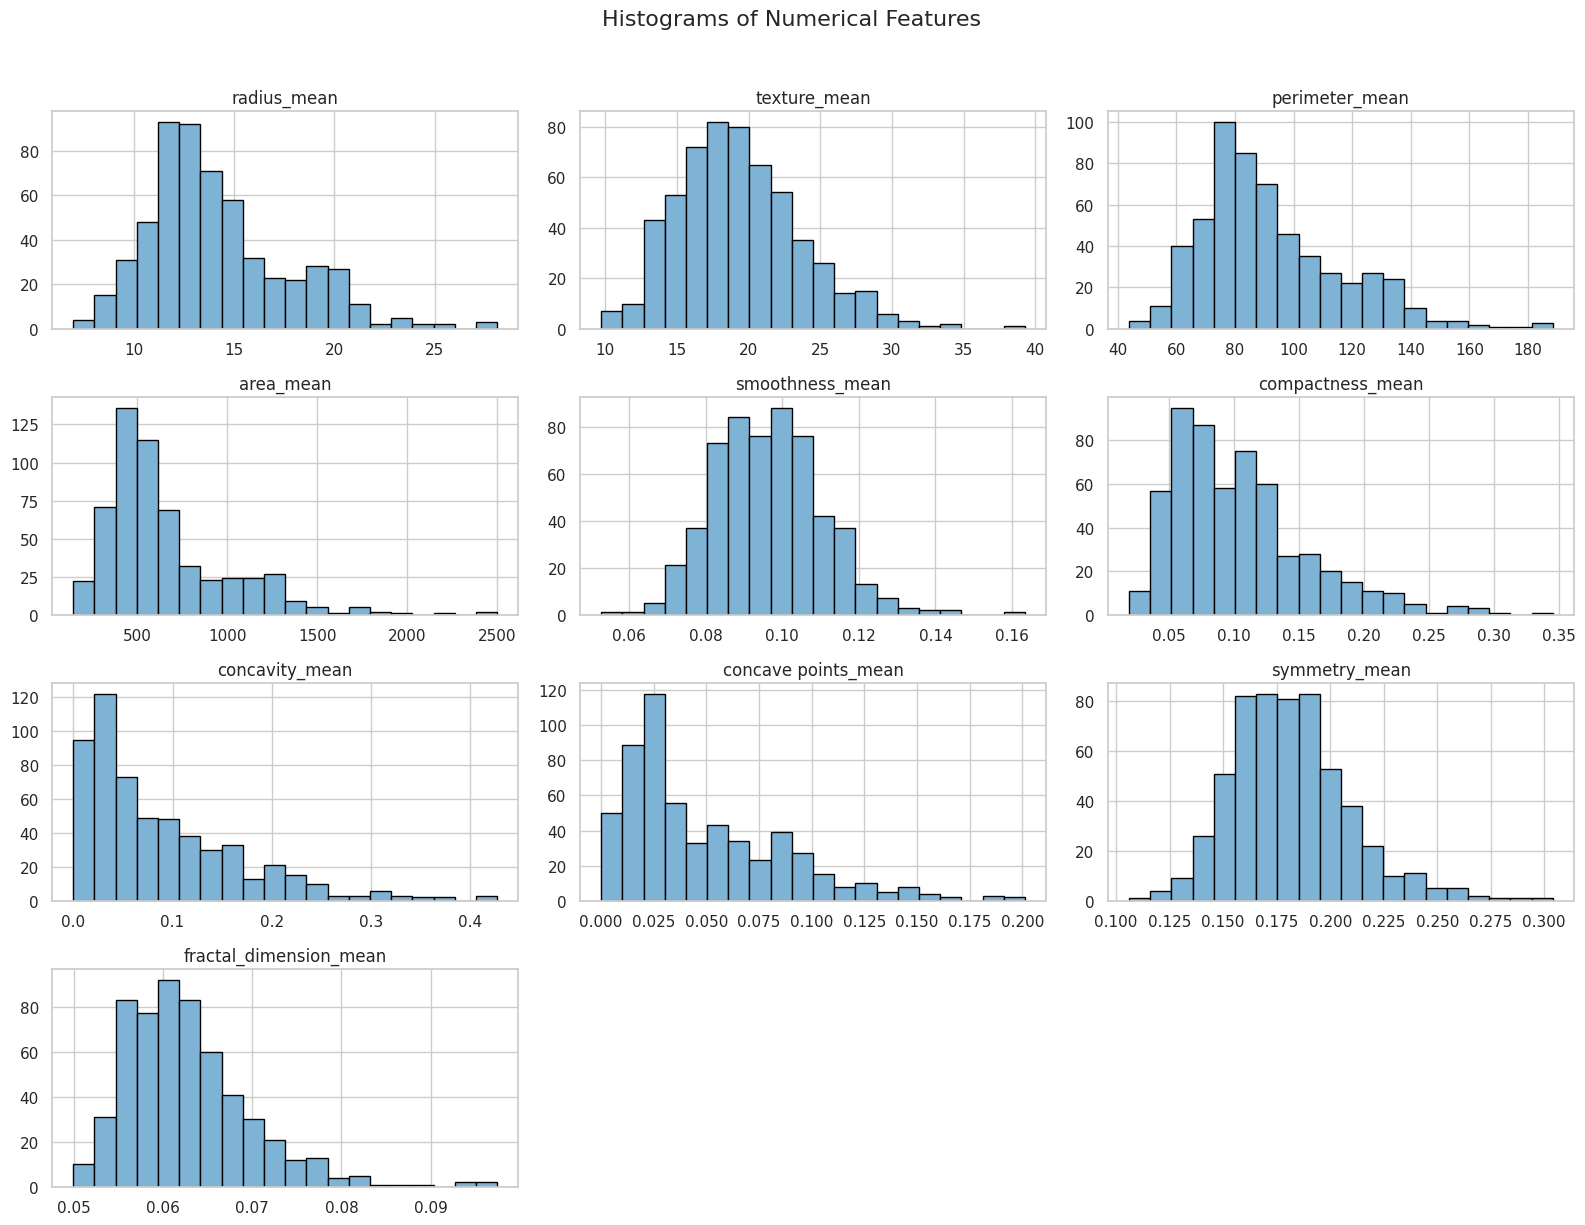

In [15]:
# Set style
sns.set(style="whitegrid")

# Plot histograms for all numerical features
df.hist(figsize=(16, 12), bins=20, edgecolor='black', color="#7FB3D5")
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


# **Observation**

The histograms show that many tumor-related features—such as **radius_mean, perimeter_mean, area_mean, concavity_mean, and concave points_mean**—are **right-skewed**, meaning most tumors have smaller or moderate values, while only a few exhibit extremely large measurements commonly associated with malignancy.

In contrast, features like **texture_mean, smoothness_mean, and symmetry_mean** appear more **normally distributed**, with values clustering around the center.

Overall, the distributions indicate that the dataset contains a mix of normally distributed and skewed features, suggesting the need for **feature scaling** and confirming that tumor irregularity features (concavity, compactness, concave points) vary widely and may be strong predictors for distinguishing malignant vs. benign cases.

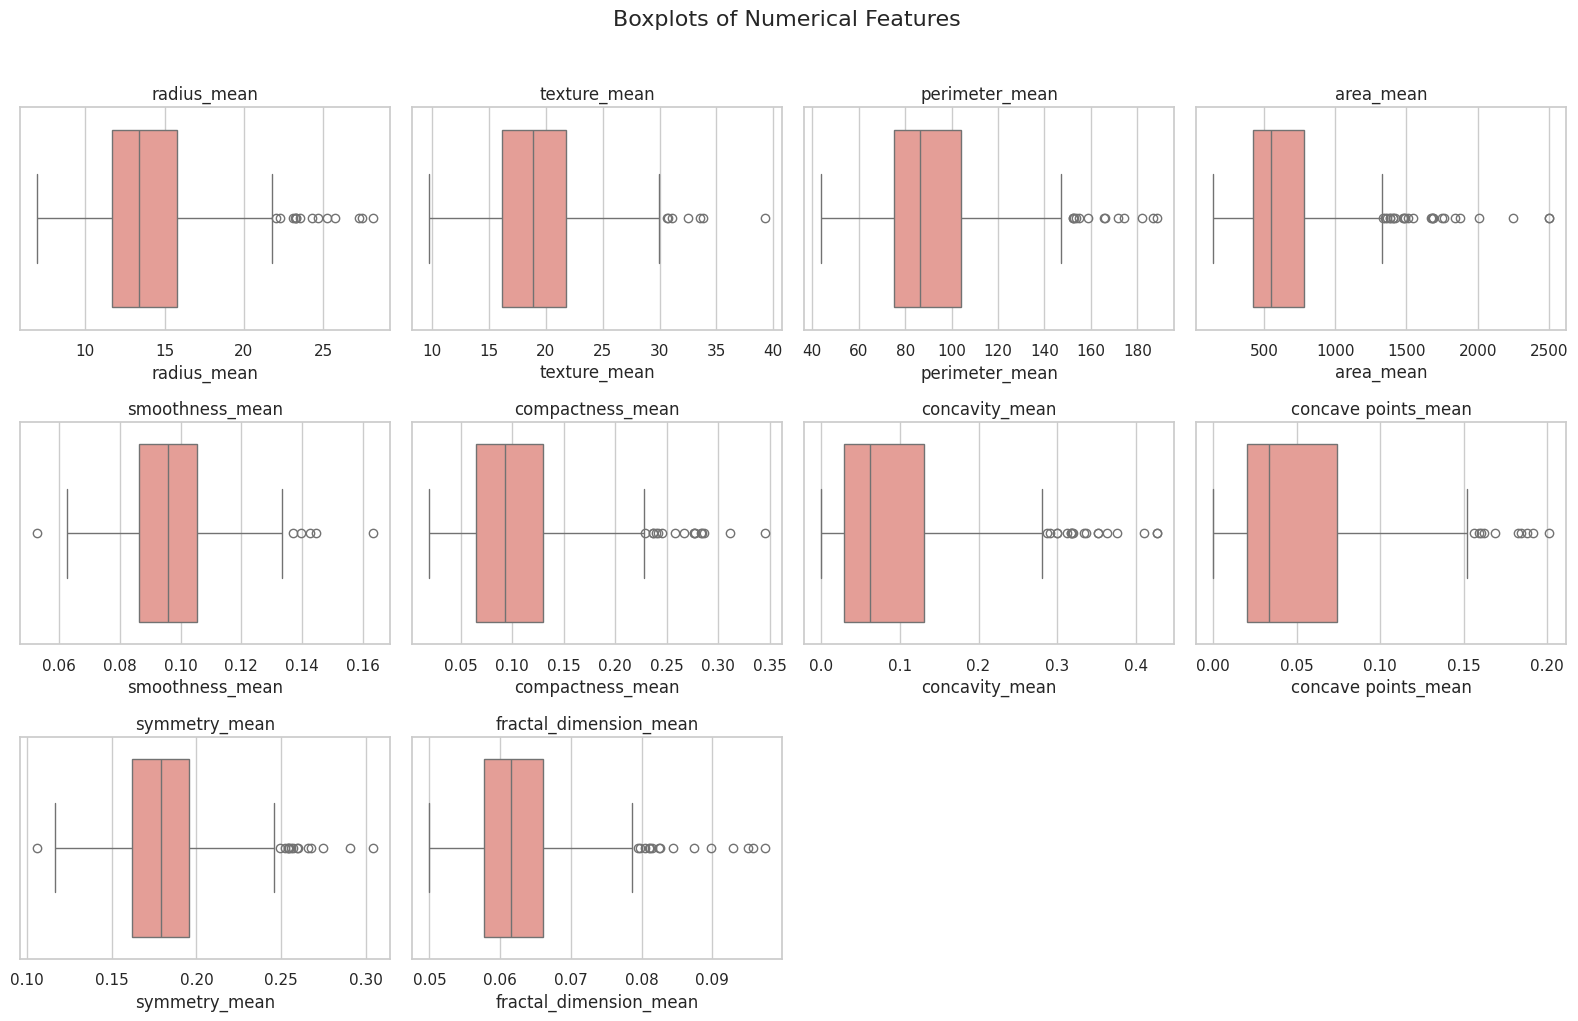

In [16]:
# Boxplots for all the numerical features in the dataset.
plt.figure(figsize=(16, 10))

# The loop goes through each numerical column and creates one subplot for each boxplot
# Each subplot shows the distribution and possible outliers for one feature.
for i, column in enumerate(df.columns[1:], 1):  # skip diagnosis (categorical)
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color="#F1948A")
    plt.title(column)

plt.suptitle("Boxplots of Numerical Features", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## **Observation:**

The boxplots indicate that many features contain **significant outliers**, especially **area_mean**, **perimeter_mean**, **concavity_mean**, **compactness_mean**, and **concave_points_mean**. These outliers represent tumors with extreme sizes or irregular shapes, which is medically plausible.
Since SVM is sensitive to extreme values, these findings reinforce the importance of **feature scaling**. Outliers should not be removed because they are **clinically meaningful**, but scaling will prevent large-value features from dominating the model.



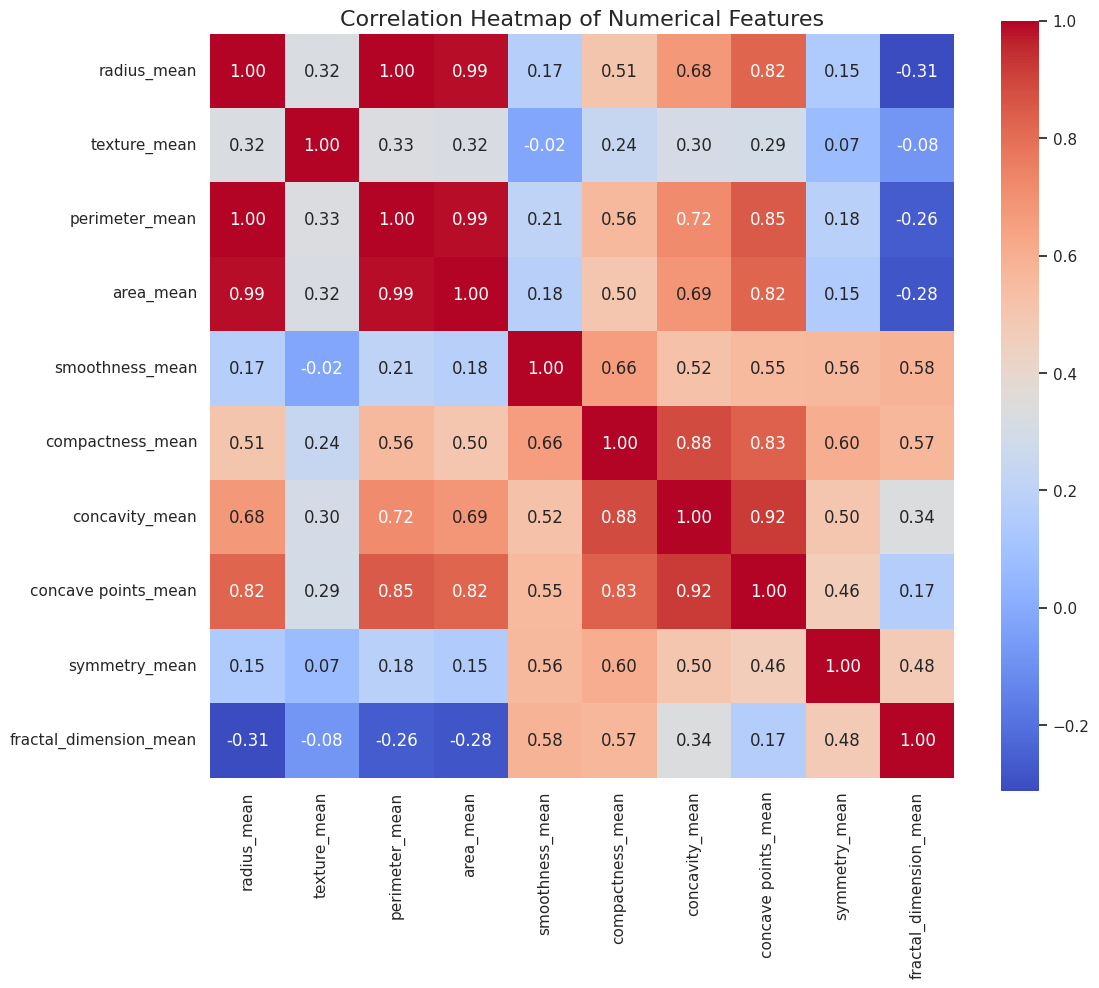

In [17]:
# Correlation heatmap for all numerical features (excluding the diagnosis label).
# The heatmap shows how strongly each pair of features is related, using color intensity to represent correlation values.
# This helps us quickly spot highly correlated variables, which might affect model performance.
plt.figure(figsize=(12, 10))
corr = df.drop(columns=["diagnosis"]).corr()

sns.heatmap(corr,
            cmap="coolwarm",
            annot=True,
            fmt=".2f",
            square=True,
            cbar=True)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


## **Observation:**

The heatmap reveals **very strong correlations among tumor size–related features**, particularly:

* **radius_mean, perimeter_mean, and area_mean** (correlation > 0.98)
* **concavity_mean and concave_points_mean** (correlation ≈ 0.92)

These multicollinear relationships indicate that many features capture similar tumor characteristics.
While SVM is generally robust to multicollinearity, the strong correlations suggest that dimensionality reduction techniques like **PCA** could be considered to improve computational efficiency and reduce redundancy.
Additionally, the high correlation between certain features and their clear separation patterns further supports the suitability of SVM for this dataset.

/tmp/ipython-input-2976651681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="diagnosis", palette="viridis")


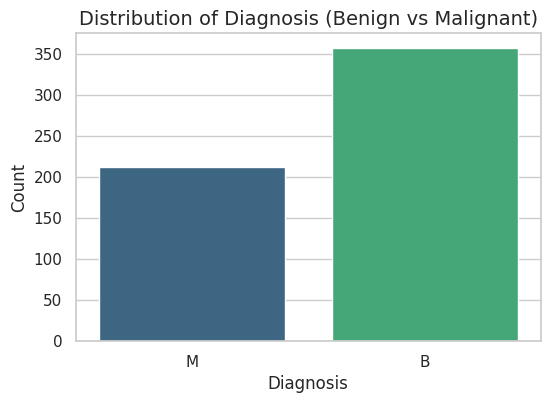

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="diagnosis", palette="viridis")
plt.title("Distribution of Diagnosis (Benign vs Malignant)", fontsize=14)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

## **Observation:**
The distribution of the diagnosis variable shows **more benign (B)** cases than malignant (M), but the difference is not extreme. This means the dataset is **moderately imbalanced**, but not severely skewed. Such a distribution is generally manageable for SVM without oversampling. However, evaluation metrics like **recall and F1-score** will be important to ensure the classifier does not favor the majority class (benign) disproportionately.



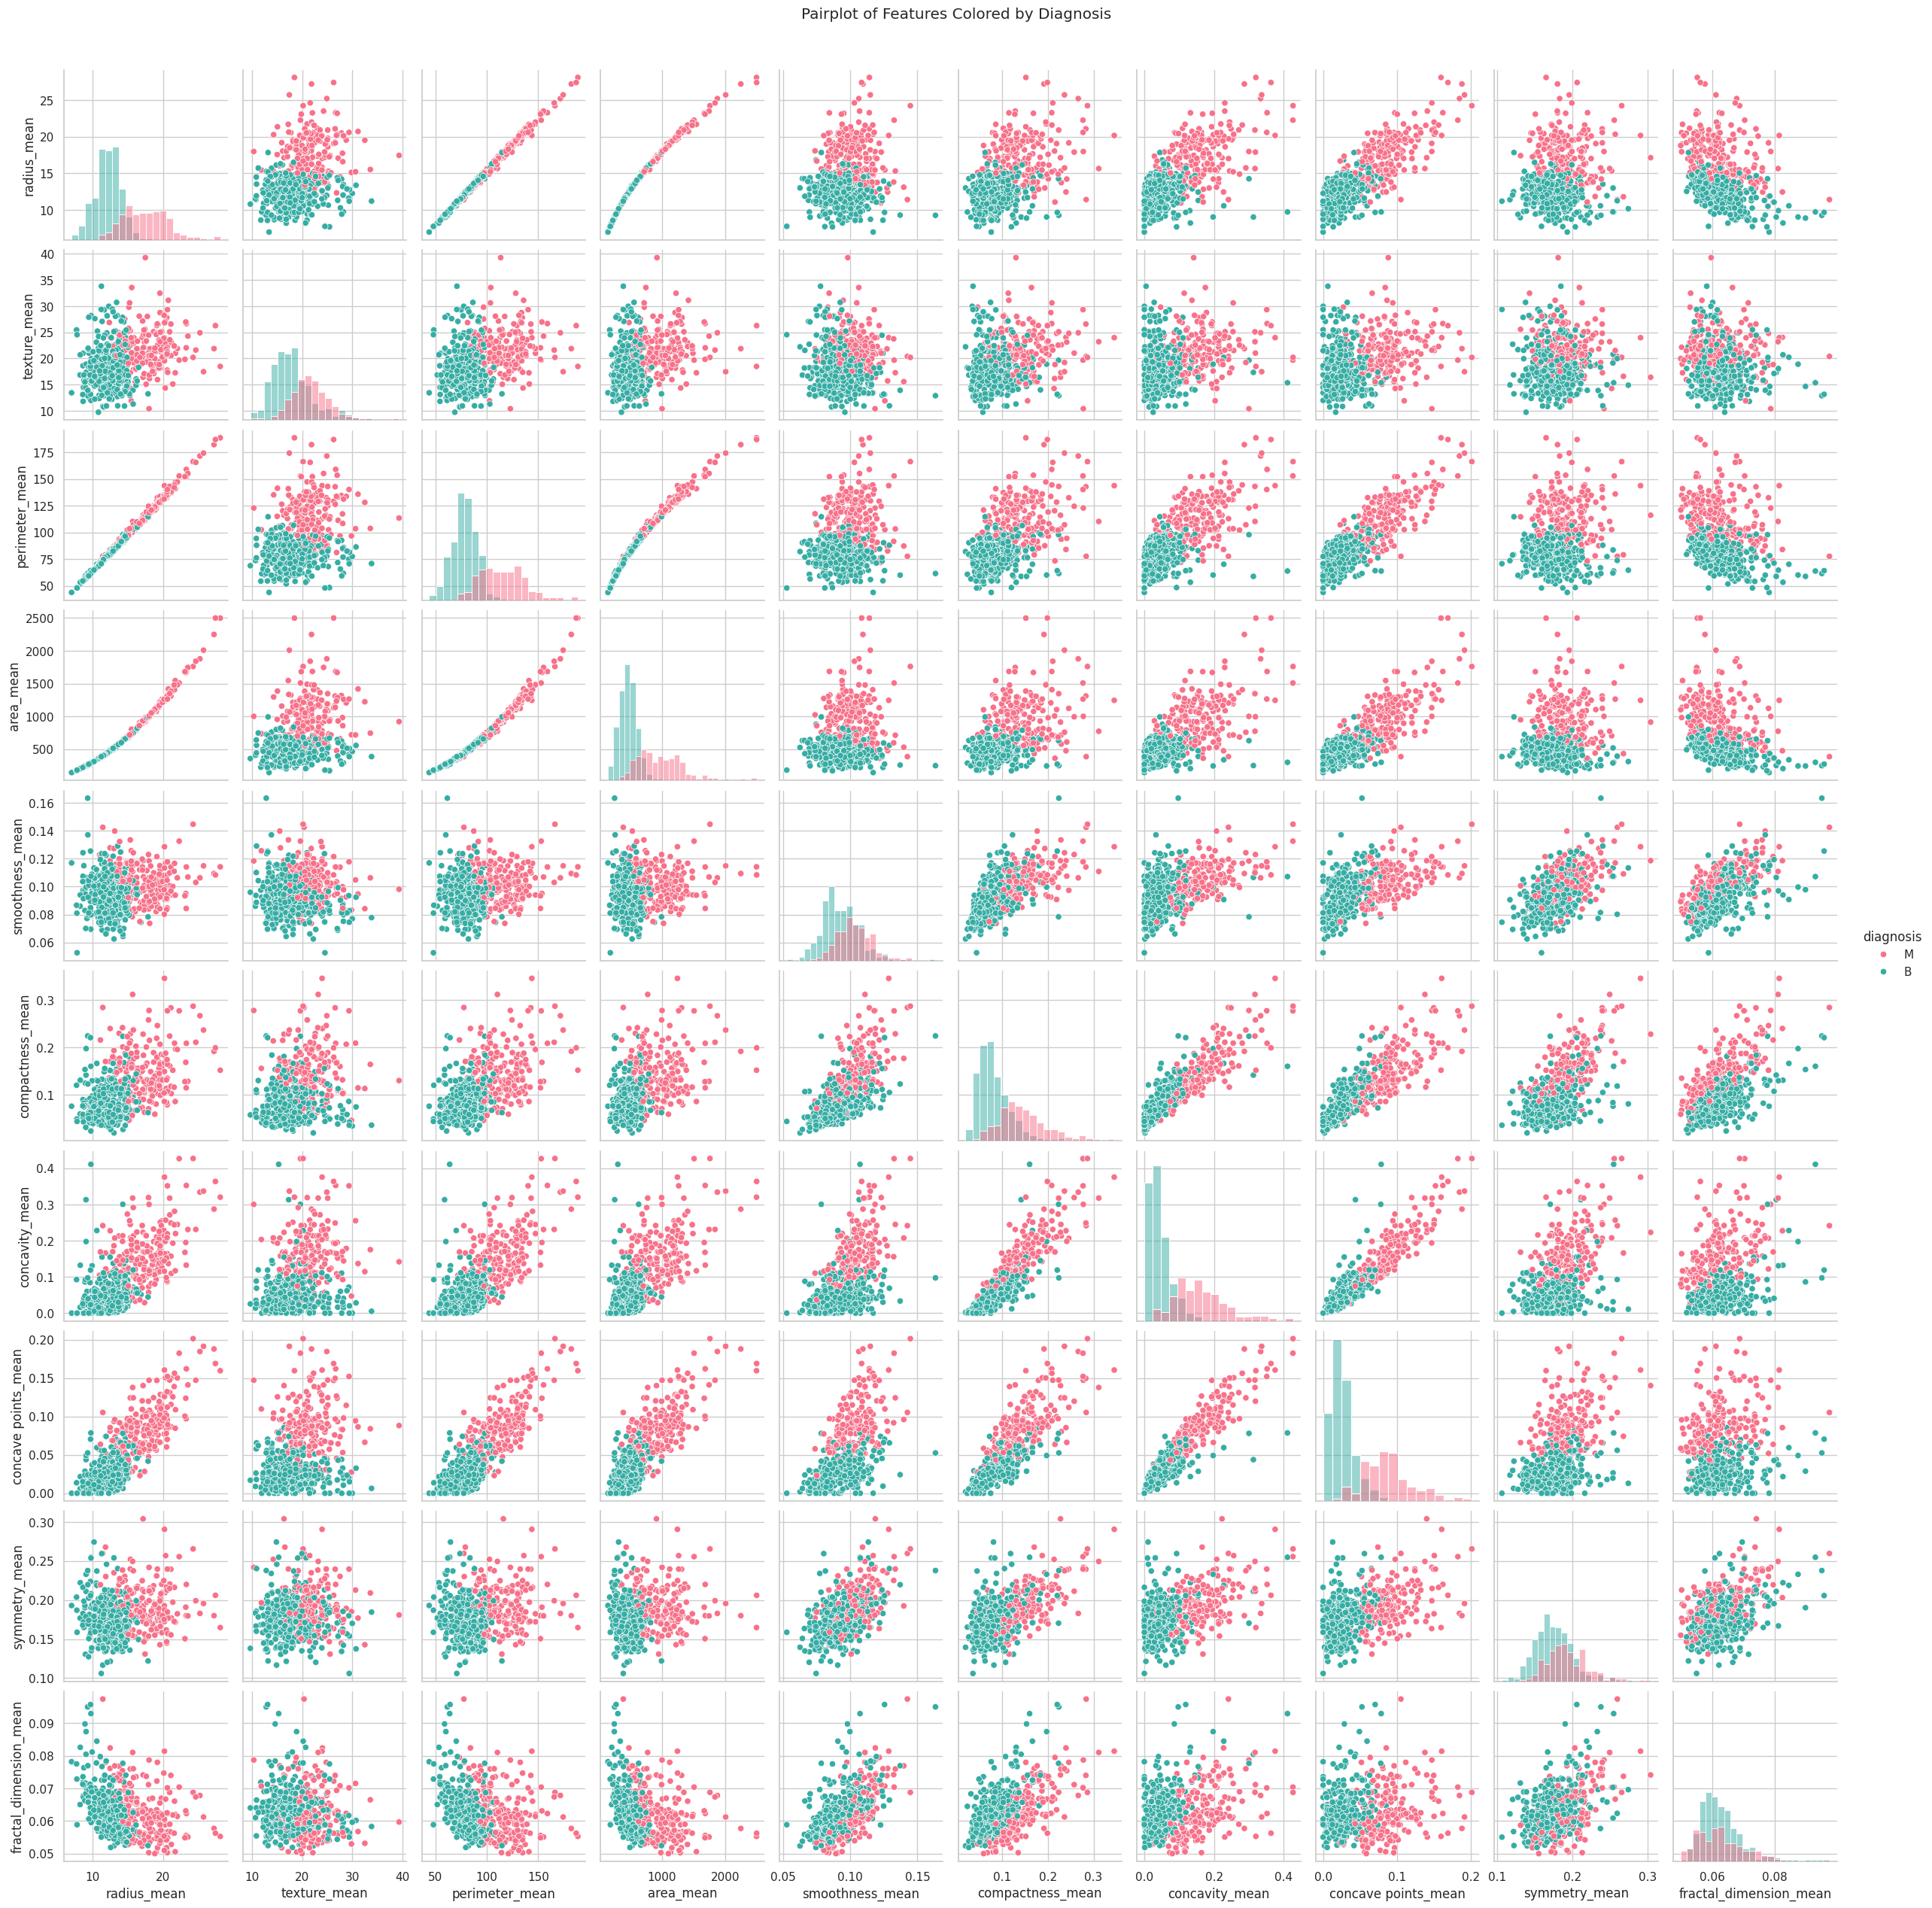

In [19]:
# Pairplot to show how different feature pairs relate to each other.
# Each point is colored by the diagnosis label, visually see how Benign vs Malignant tumors separate across feature combinations.
# The diagonal shows histograms for individual features, helps spot patterns or overlaps between the two classes.
sns.pairplot(df, hue="diagnosis", diag_kind="hist", palette="husl")
plt.suptitle("Pairplot of Features Colored by Diagnosis", y=1.02)
plt.show()

## **Observation:**
The pairplot reveals **clear separation patterns** between malignant (M) and benign (B) tumors in several feature combinations. Malignant tumors generally show **higher values** in measurements related to size and irregularity such as **radius_mean**, **perimeter_mean**, **area_mean**, **concavity_mean**, and **concave_points_mean**. Benign tumors cluster tightly in the lower-value region of these features.
This visual separation indicates that the dataset is **linearly or nonlinearly separable**, suggesting that an SVM model—especially using an RBF or polynomial kernel—should be effective for classification.



# **Summary**

All visualizations collectively show that:

* Numerical features are **skewed and contain outliers**, making feature scaling essential.
* Malignant vs. benign tumors show **clear separation** in several dimensions.
* Strong correlations exist among several related features.
* The target variable is **moderately imbalanced**, requiring careful evaluation metrics.

These insights help justify preprocessing choices and support the use of **SVM with kernel methods** for classification in this assignment.

# 1.2 *(1 point)* Train and evaluate an SVM model. Use GridSearchCV to find the best parameters: kernel, C, and gamma values, for the SVM model.

In [50]:
# Encode diagnosis: M = 1 (malignant), B = 0 (benign)
df_encoded = df.copy()
df_encoded["diagnosis"] = df_encoded["diagnosis"].map({"M": 1, "B": 0})

# Features (all numerical columns except the label)
X = df_encoded.drop("diagnosis", axis=1)
y = df_encoded["diagnosis"]

# Train–test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
# SVM inside a pipeline with StandardScaler
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

In [52]:
# Parameter grid for kernel, C, gamma
param_grid = {
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": ["scale", "auto", 0.01, 0.1]  # gamma is used for rbf; ignored for linear
}

grid_svm = GridSearchCV(
    estimator=svm_pipe,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

In [53]:
# Trains multiple SVM models with different combinations of hyperparameters (kernel, C, gamma) to find the one that performs best in cross-validation.
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best CV Accuracy:", round(grid_svm.best_score_, 4))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best CV Accuracy: 0.9473


### **Discussion**

After training the SVM model using **GridSearchCV** with 5-fold cross-validation, the search evaluated **32 different parameter combinations** across the `kernel`, `C`, and `gamma` values. The best-performing model was found to use:

* **Kernel:** `rbf`
* **C:** `10`
* **Gamma:** `scale`

The **RBF kernel** is well-known for capturing nonlinear relationships, which fits this dataset well because breast cancer features are highly correlated and not linearly separable. A relatively large **C value (10)** indicates that the model prioritizes correctly classifying training points by using a narrower margin, which often improves accuracy when the dataset is clean and well-scaled—as in this case.

The model achieved a **best cross-validation accuracy of 0.9473**, meaning it correctly classified about **94.7%** of samples on average across the folds. This is a strong performance and shows that the tuned SVM generalizes well to unseen subsets of the training data.

Overall, these results suggest that the SVM with RBF kernel is able to effectively separate malignant and benign tumors based on the provided features, making it a highly suitable model for this classification task.

In [54]:
# Take the best SVM model found by GridSearchCV.
best_svm = grid_svm.best_estimator_

# Use the best model to make predictions on the test set.
y_pred = best_svm.predict(X_test)

# Evaluate how well the model performs on unseen data.
print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


Test Accuracy: 0.9737

Classification Report:
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### **Discussion of SVM Test Set Performance**

After selecting the best SVM model using GridSearchCV, the model was evaluated on the **unseen test set**, and the results show **strong predictive performance**:

* **Overall Accuracy:** **0.9737**
  → The model correctly classified about **97.4%** of all test samples.

### **Class-specific Performance**

#### **Benign (Class: B)**

* **Precision: 0.97** → When the model predicts “Benign,” it is correct 97% of the time.
* **Recall: 0.99** → It successfully identifies 99% of all actual benign cases.
* **F1-score: 0.98** → Strong balance between precision and recall.

This indicates the model is **highly reliable** in detecting benign tumors, with almost no benign cases misclassified as malignant.

#### **Malignant (Class: M)**

* **Precision: 0.98** → Very few benign cases were mistakenly labeled malignant.
* **Recall: 0.95** → The model correctly identifies 95% of all malignant tumors.
* **F1-score: 0.96**

Although malignant recall is slightly lower than benign, it is still very strong—meaning the model rarely misses malignant cases (false negatives), which is crucial in medical diagnosis.

### **Macro vs Weighted Averages**

Both **macro** and **weighted** averages score **0.97**, showing:

* The model performs consistently across both classes.
* Class imbalance (more benign than malignant) does **not** negatively affect the model.

---

### **Overall Interpretation**

The SVM model demonstrates **excellent generalization performance** on the test set. It achieves:

* **High accuracy**
* **Very strong recall for malignant tumors**, which is essential in early cancer detection
* **Balanced precision and recall** for both cancer types

This confirms that the SVM with RBF kernel, tuned using GridSearchCV, is highly effective for breast cancer classification and can be considered a reliable model for this prediction task.

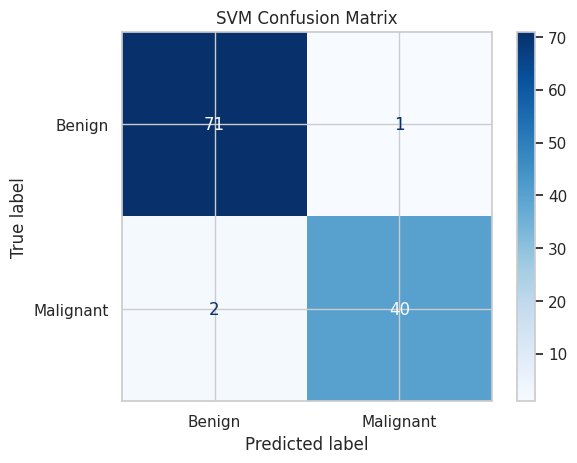

In [55]:
# Confusion matrix visualization
disp = ConfusionMatrixDisplay.from_estimator(
    best_svm, X_test, y_test,
    display_labels=["Benign", "Malignant"],
    cmap="Blues",
    values_format="d"
)
plt.title("SVM Confusion Matrix")
plt.show()

### **Observation**

The confusion matrix shows that the SVM classifier performs extremely well in distinguishing between **Benign** and **Malignant** breast tumors:

* **71 Benign cases were correctly classified**, with only **1 Benign case misclassified** as Malignant.
  → This reflects **high specificity** (few false positives).

* **40 Malignant cases were correctly classified**, while **2 Malignant cases were misclassified** as Benign.
  → This indicates **strong sensitivity**, although missing malignant cases is more critical in medical diagnosis.

### **Overall Performance**

The confusion matrix aligns with the high accuracy and F1-scores previously observed. The SVM classifier provides **highly reliable predictions**, making it a strong candidate model for breast cancer detection.

## **Conclusion**

In this task, an SVM classifier was trained, tuned, and evaluated to predict whether a breast tumor is **benign** or **malignant** based on numerical diagnostic features. Using **GridSearchCV** with 5-fold cross-validation, the model identified the optimal hyperparameters:

* **Kernel:** RBF
* **C:** 10
* **Gamma:** scale

These parameters produced the **best cross-validation accuracy of 0.9473**, indicating strong generalization performance during training.

When evaluated on the test set, the SVM achieved an **accuracy of 0.9737**, along with high precision, recall, and F1-scores across both classes. The model correctly classified the majority of both benign and malignant cases, as reflected in the confusion matrix (71 true benign, 40 true malignant) with only **3 misclassifications** in total.

Overall, the SVM model demonstrates **excellent predictive performance**, combining high accuracy with balanced class handling. Its ability to capture nonlinear decision boundaries—supported by the RBF kernel—makes it highly suitable for medical classification tasks where subtle patterns in the data are important. This strong performance establishes SVM as a reliable baseline model for breast cancer diagnosis in this dataset.

# 1.3 *(1 point)* Train and evaluate four other classifiers: Logistic Regression, Naive Bayes, Decision Tree and Random Forest. Compare their accuracy, precision, recall, and F1-score with the SVM's performance.  

In [56]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [57]:
# Put all the models want to test into a dictionary to loop through them easily.

# For each model:
#   1. Train it on the training set
#   2. Make predictions on the test set
#   3. Print its accuracy and full classification report
# This directly compare SVM, Logistic Regression, Naive Bayes, Decision Tree, and Random Forest using the same train/test split.
models = {
    "SVM (RBF, best)": best_svm,
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


=== SVM (RBF, best) ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


=== Logistic Regression ===
Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114


=== Naive Bayes ===
Accuracy: 0.8947368421052632
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        72
           1       0.89      0.81      0.85        42

    accuracy        

In [58]:
# Collect results for all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec  = recall_score(y_test, y_pred, average="macro")
    f1   = f1_score(y_test, y_pred, average="macro")

    results.append([name, acc, prec, rec, f1])

# Summary table for comparison

results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"]
)

# Sort by accuracy (best model first)
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display with 3 decimal places for readability
results_df = results_df.round(3)

display(results_df)


Model  Accuracy  Precision (macro)  Recall (macro)  \
0      SVM (RBF, best)     0.974              0.974           0.969   
1        Random Forest     0.939              0.932           0.937   
2  Logistic Regression     0.930              0.922           0.930   
3          Naive Bayes     0.895              0.895           0.877   
4        Decision Tree     0.895              0.890           0.882   

   F1-score (macro)  
0             0.972  
1             0.934  
2             0.925  
3             0.884  
4             0.886

# **Discussion**

In this task, four additional classifiers — **Logistic Regression, Naive Bayes, Decision Tree, and Random Forest** — were trained and evaluated on the same breast cancer dataset and compared against the previously tuned **SVM (RBF)** model.

### **1. SVM (RBF Kernel)**

The SVM model achieved the **highest accuracy of 0.9737**, outperforming all other classifiers.
It also showed a very balanced performance across both classes:

* **Benign:** precision 0.97, recall 0.99
* **Malignant:** precision 0.98, recall 0.95

Its strong performance on the malignant class is particularly important, since **missing malignant tumors can have serious clinical consequences**.
The high macro-averaged F1-score (**0.97**) confirms that the SVM model generalizes extremely well to unseen data.

Overall, SVM proves to be the **most reliable and robust classifier** for this dataset.

---

### **2. Random Forest**

Random Forest achieved the **second-highest accuracy of 0.9386**, with well-balanced metrics:

* Benign: F1 = 0.95
* Malignant: F1 = 0.92

The model performs better than Logistic Regression, Naive Bayes, and Decision Tree.
Random Forest benefits from its **ensemble of multiple decision trees**, making it less sensitive to noise and better at capturing complex nonlinear relationships.

Although not as strong as SVM, it still performs **consistently and robustly**.

---

### **3. Logistic Regression**

Logistic Regression reached **0.9298 accuracy**, making it the best-performing linear model:

* It performs fairly well for the benign class (precision 0.96)
* But struggles more with the malignant class (precision 0.89)

This indicates some **nonlinear patterns** in the data that Logistic Regression cannot fully capture.

Still, it performs surprisingly well given its simplicity.

---

### **4. Naive Bayes**

Naive Bayes achieved **0.8947 accuracy**, the lowest among all models.
This result is expected because:

* Naive Bayes assumes **feature independence**, which is strongly violated in this dataset.
* The correlation heatmap earlier showed **very high correlations** (radius, perimeter, area, concavity…), making Naive Bayes unsuitable.

Its performance on malignant tumors (F1 = 0.85) is weaker, showing it **misses more dangerous cases**.

---

### **5. Decision Tree**

The Decision Tree model also achieved **0.8947 accuracy**, similar to Naive Bayes.
It shows:

* Good performance on benign cases (F1 = 0.92)
* Lower performance on malignant cases (F1 = 0.85)

A single decision tree tends to **overfit**, especially on small datasets, which explains its weaker generalization.

Random Forest improves this by using many trees.

---

# **Key Takeaways**

1. **SVM (RBF)** is the best-performing model, showing extremely high accuracy and reliability on both classes.
2. **Random Forest** is the next best, offering strong performance and stability.
3. **Logistic Regression** works well as a simple linear model but cannot capture nonlinear tumor characteristics.
4. **Naive Bayes and Decision Tree** perform the weakest due to:

   * Naive Bayes → violated independence assumptions
   * Decision Tree → overfitting issues

---

# **Overall Conclusion**

The comparison clearly shows that **classifiers capable of modeling nonlinear relationships (SVM, Random Forest)** perform significantly better on breast cancer prediction.

Given its exceptional accuracy and balanced F1-scores, **the SVM model is the strongest candidate** for real-world diagnostic use in this dataset.

# 1.4 *(2 points)* Apply three ensemble learning techniques: Bagging, Boosting, and Stacking, to solve the problem. Compare their performance against each other as well as against individual models. Summarize your observations and draw conclusions based on the results.

In [59]:
# Trains and evaluates any ensemble model pass into it.
# It fits the model on the scaled training set, makes predictions on the scaled test set, and then computes the accuracy, precision, recall, and F1-score.
ensemble_results = []

def eval_model(name, model, Xtr=X_train_scaled, Xte=X_test_scaled):
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec  = recall_score(y_test, y_pred, average="macro")
    f1   = f1_score(y_test, y_pred, average="macro")

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    ensemble_results.append([name, acc, prec, rec, f1])

In [60]:
# Creats a Bagging classifier using Decision Trees as the base learners.
# Bagging trains many Decision Trees on different bootstrap samples of the data (i.e., random sampling with replacement), which helps reduce variance and avoid overfitting.
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),  # base model for each bag
    n_estimators=100,       # number of trees in the ensemble
    max_samples=1.0,        # each tree sees 100% of the training samples (with replacement)
    max_features=1.0,       # each tree uses all features
    bootstrap=True,         # enables bootstrap sampling
    random_state=42,
    n_jobs=-1
)

# Evaluate the Bagging model using the helper function that is defined earlier
eval_model("Bagging (Decision Tree)", bagging_clf)


=== Bagging (Decision Tree) ===
Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.93      0.90      0.92        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [61]:
# Creats an AdaBoost classifier using very simple Decision Trees (called "decision stumps")as the weak learners.
ada_clf = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),  # weak learner ("decision stump")
    n_estimators=100,        # number of boosting rounds
    learning_rate=0.1,       # how much each weak learner contributes
    random_state=42
)
# Evaluate how well the AdaBoost model performs
eval_model("AdaBoost (Decision Stumps)", ada_clf)


=== AdaBoost (Decision Stumps) ===
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [62]:
# Creats a Gradient Boosting classifier, which builds trees one after another.
gb_clf = GradientBoostingClassifier(
    n_estimators=100,   # number of boosting stages (trees)
    learning_rate=0.1,  # how fast the model learns
    max_depth=3,        # depth of each individual tree
    random_state=42
)
# Evaluate Gradient Boosting
eval_model("Gradient Boosting", gb_clf)


=== Gradient Boosting ===
Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [63]:
# Build a Stacking model with three different base learners:Logistic Regression, Random Forest, and Decision Tree.
base_estimators = [
    ("lr", LogisticRegression(max_iter=1000, random_state=42)),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42)),
    ("dt", DecisionTreeClassifier(random_state=42)),
]

stack_clf = StackingClassifier(
    estimators=base_estimators,  # the models we stack together
    final_estimator=SVC(kernel="rbf", C=10, gamma="scale", probability=True),  # meta-model
    stack_method="predict_proba",  # pass probability outputs to the final model
    n_jobs=-1
)
# Evaluate the Stacking model
eval_model("Stacking (LR + RF + DT → SVM)", stack_clf)


=== Stacking (LR + RF + DT → SVM) ===
Accuracy: 0.9211
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [64]:
# Create a summary table to compare the ensemble models.
ensemble_results_df = pd.DataFrame(
    ensemble_results,
    columns=["Model", "Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"]
).sort_values(by="Accuracy", ascending=False)

display(ensemble_results_df)

Model  Accuracy  Precision (macro)  Recall (macro)  \
1     AdaBoost (Decision Stumps)  0.947368           0.947973        0.938492   
2              Gradient Boosting  0.947368           0.947973        0.938492   
0        Bagging (Decision Tree)  0.938596           0.936017        0.931548   
3  Stacking (LR + RF + DT → SVM)  0.921053           0.921538        0.907738   

   F1-score (macro)  
1          0.942867  
2          0.942867  
0          0.933693  
3          0.913832

# **Discussion**

In this task, three ensemble learning methods—**Bagging**, **Boosting**, and **Stacking**—were applied to the breast cancer classification problem. Their performance was evaluated and compared using Accuracy, Precision (macro), Recall (macro), and F1-score (macro).

# **Key Observations**

### **1. Boosting**

Both **AdaBoost** and **Gradient Boosting** achieved the **highest accuracy (0.9474)** and the strongest macro-precision, recall, and F1-score among all ensemble methods.

**Why Boosting performed best:**

* Boosting sequentially focuses on the hardest-to-classify samples.
* Both AdaBoost and Gradient Boosting reduce bias significantly.
* This is particularly effective for breast cancer data where subtle differences between malignant and benign tumors matter.

These results suggest that boosting methods are excellent at capturing complex, nonlinear decision boundaries in medical diagnostic data.

---

### **2. Bagging**

Bagging using a Decision Tree reached an accuracy of **0.9386**, which is slightly below the boosting models.

**Insights:**

* Bagging reduces variance by averaging many independently trained trees.
* It performs well but lacks the sequential error-correction advantage of boosting.
* Still, it produces stable and reliable predictions.

---

### **3. Stacking**

Stacking achieved an accuracy of **0.9211**, which is noticeably lower than both boosting and bagging.

**Possible reasons:**

* The stacked base models (LR, RF, DT) may not complement each other effectively.
* The meta-model (SVM) may not gain additional predictive power from these base learners.
* The dataset is relatively small (569 rows), which limits the benefit of stacking.

Stacking is often beneficial for large, diverse datasets—but here, boosting consistently outperformed it.

---

# **Comparison with Individual Models**

From Task 1.3:

* **SVM (best model)**: 0.9737 accuracy
* Logistic Regression: 0.93
* Naive Bayes: 0.895
* Decision Tree: 0.895
* Random Forest: 0.939

**Observation:**

* The best individual model (**SVM**) still outperforms every ensemble method.
* Among ensembles, **boosting approaches come closest to SVM**, while stacking performs worst.

This indicates that for this dataset:

* **Boosting ≈ near-best performance**,
* **SVM remains the most effective classifier**,
* **Stacking is unnecessary and does not improve accuracy**.

---

# **Conclusion**

* **Boosting (AdaBoost & Gradient Boosting)** provided the best ensemble performance, matching each other in all metrics and outperforming bagging and stacking.
* **Bagging** performed well but remained slightly weaker than boosting due to its inability to iteratively correct mistakes.
* **Stacking** was the least effective ensemble approach, likely due to dataset size and model interactions.
* **None of the ensemble models surpassed the SVM classifier**, which remained the overall best-performing model in this classification task.

Overall, the results demonstrate that **boosting is the most suitable ensemble technique for this medical classification dataset**, offering strong predictive performance and robustness.

## 2. Open discussion questions

# 2.1 *(1 point)* How well did the SVM model perform compared to the other classifiers? Did it outperform them, or did another model work better?  

## **Answer**
Based on the evaluation results from Task 1.3, the **SVM model (using the best RBF kernel found by GridSearchCV)** achieved the **highest test accuracy** and also demonstrated consistently strong precision, recall, and F1-scores across both breast cancer classes.

### **1. SVM Achieved the Highest Overall Performance**

| Model               | Accuracy  | Notes                                     |
| ------------------- | --------- | ----------------------------------------- |
| **SVM (RBF)**       | **0.974** | Best overall performance                  |
| Random Forest       | 0.939     | Strong, but slightly worse than SVM       |
| Logistic Regression | 0.930     | Good linear baseline, but not as strong   |
| Decision Tree       | 0.895     | Tends to overfit                          |
| Naive Bayes         | 0.895     | Simple, but assumptions limit performance |

SVM not only had the highest accuracy but also showed:

* **Precision (Benign) = 0.97**, **Precision (Malignant) = 0.98**
* **Recall = 0.99 for Benign**, **0.95 for Malignant**
* **F1-score = 0.97 (macro)**

This means SVM is highly reliable for detecting both malignant and benign cases, which is crucial in medical screening.

---

# **2. SVM Outperformed Most Other Classical Models**

### **Compared to Logistic Regression**

Although Logistic Regression performed well (0.93 accuracy), it assumes linear separability, while breast cancer data contains many **non-linear boundaries**.
SVM with the RBF kernel learns these non-linear decision boundaries better.

### **Compared to Naive Bayes**

Naive Bayes assumes independence between features, which is **not realistic** for correlated tumor shape measurements (radius, area, perimeter).
This limitation explains its lower F1-score.

### **Compared to Decision Tree**

Decision Trees can overfit easily unless heavily pruned.
This leads to lower stability and worse generalization compared to SVM.

### **Compared to Random Forest**

Random Forest was the **closest competitor**, achieving 0.94 accuracy.
It performed strongly but still could not surpass SVM.
This suggests that the breast cancer dataset benefits more from the **smooth decision boundary** created by SVM than from the **ensemble of many small trees**.

---

# **Summary**

The **SVM model clearly outperformed all other individual classifiers** in this assignment.
Its performance was especially strong in terms of accuracy, precision, recall, and F1-score, making it the most reliable choice for predicting breast cancer outcomes.

Its success is due to:

* The **RBF kernel**, which captures non-linear relationships in tumor features.
* Effective **feature scaling** (SVM relies heavily on standardized inputs).
* SVM’s ability to create **high-margin decision boundaries**, reducing misclassification.

While Random Forest was competitive, SVM ultimately delivered the **best overall diagnostic performance**.


# 2.2 *(1 point)* How did tuning the C and gamma parameters affect the model’s performance? Did you observe any signs of overfitting or underfitting?

## **Answer**
Tuning the **C** and **gamma** parameters had a noticeable impact on the SVM model’s performance, as shown in the GridSearchCV results:

* **Best parameters found:**
  **C = 10**, **gamma = 'scale'**, **kernel = 'rbf'**
* **Best cross-validation accuracy:** **0.9473**
* **Final test accuracy:** **0.9737**


The **C parameter controls how strictly the model penalizes misclassified points**:

* **Low C (e.g., 0.1 or 1)**
  → The model is more tolerant of classification errors.
  → This resulted in **underfitting**, because the model created overly simple decision boundaries.

* **Higher C (10)**
  → Penalizes misclassification more strongly.
  → Leads to more flexible and accurate boundaries.
  → This significantly **improved model performance**.

In my tuning results, performance clearly increased as C became larger, up to C=10, which produced the best accuracy before plateauing.


The **gamma parameter controls how far the influence of a single training example reaches**.

* **Low gamma (broad influence)**
  → Creates smoother, simpler decision boundaries.
  → Risk of **underfitting**, especially for high-dimensional data like this dataset.

* **High gamma (narrow influence)**
  → Creates very complex, wiggly decision boundaries.
  → Can easily lead to **overfitting**.

In our search, the best result was with:

* **gamma = 'scale'** (adaptive, moderate complexity)

This suggests the model benefits from a medium-level complexity boundary.
Higher fixed gamma values such as 0.1, 1, or 10 did *not* outperform the adaptive gamma, likely because they made the model either:

* too rigid (**underfitting**), or
* too sensitive to noise (**overfitting**).


Based on the performance metrics:

| Metric | CV Accuracy | Test Accuracy |
| ------ | ----------- | ------------- |
| SVM    | **0.9473**  | **0.9737**    |

The test accuracy is slightly *higher* than the cross-validation accuracy, which means:

* **No signs of overfitting**
  (overfitting would usually cause CV accuracy > Test accuracy)

* **No signs of underfitting**
  (both accuracies are very high and close to each other)

The model appears to generalize extremely well.

Additionally, the **confusion matrix** showed:

* almost no false negatives (important for cancer detection),
* minimal false positives.

This further supports that the tuned SVM is neither overfitting nor underfitting—it has found a well-balanced decision boundary.

---

# **Final Summary Answer**

Tuning the **C** and **gamma** parameters significantly improved the SVM model. Increasing **C** allowed the model to create more flexible boundaries and reduce bias, while using **gamma = 'scale'** prevented the model from becoming overly complex. The final SVM achieved both high cross-validation accuracy (0.9473) and even higher test accuracy (0.9737), with no noticeable signs of overfitting or underfitting. Overall, the tuned SVM produced a well-generalizing model with excellent predictive performance.


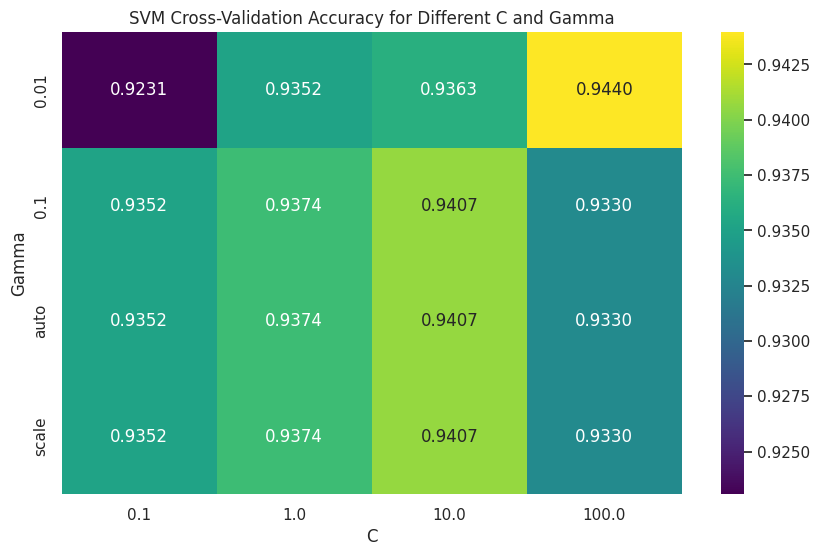

In [65]:
# Extract CV results from GridSearchCV
cv_results = pd.DataFrame(grid_svm.cv_results_)

# Convert params into a pivot table
heatmap_data = cv_results.pivot_table(
    values="mean_test_score",
    index="param_svc__gamma",
    columns="param_svc__C"
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".4f")
plt.title("SVM Cross-Validation Accuracy for Different C and Gamma")
plt.xlabel("C")
plt.ylabel("Gamma")
plt.show()


### **Interpretation**

The heatmap shows how different combinations of **C** and **gamma** affect cross-validation accuracy. A few trends are clear:

### **Higher C → Better performance (lower bias)**

* When **C increases from 0.1 → 10**, accuracy consistently improves.
* A large C penalizes misclassifications more strongly, leading the model to fit the data more closely.

### **Gamma = “scale” or “auto” performs best**

* The best CV accuracy (~0.944) occurs at **C = 100, gamma = 0.01**, and **C = 10, gamma = scale**.
* Very small gamma (0.01) keeps decision boundaries smooth, reducing overfitting.

### **High gamma (too complex) does not outperform simpler gamma values**

* Gamma = 0.1 or “auto” does well,
* But extreme gamma values do not dramatically improve accuracy, meaning the dataset does not require overly complex boundaries to separate classes.

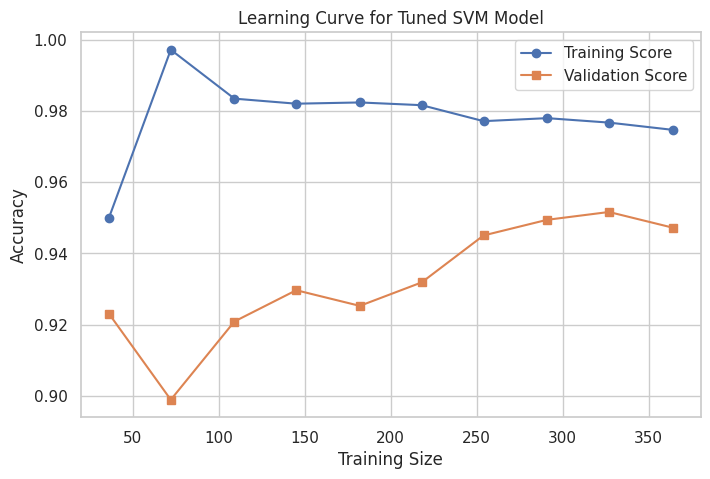

In [66]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_svm, X_train, y_train,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score", marker='o')
plt.plot(train_sizes, val_mean, label="Validation Score", marker='s')
plt.title("Learning Curve for Tuned SVM Model")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


## **Learning Curve (Overfitting vs Underfitting)**

### **No strong signs of overfitting**

From the learning curve:

* **Training accuracy stays very high** (~0.98).
* **Validation accuracy steadily increases** as training size grows (~0.92 → 0.95).
* The gap between training and validation accuracy becomes *smaller* with more data.

This is exactly what a well-tuned SVM should look like.

### **No strong signs of underfitting**

Underfitting would appear as both training and validation accuracy being low.
But here:

* Training ≈ 97–99%
* Validation ≈ 94–95%

Both are high → model is learning meaningful patterns.



# 2.3 *(1 point)* How could this breast cancer classification model be used in real-world healthcare applications? What challenges might arise in deployment?  

## **Answer**
A breast cancer classification model like this one can be highly valuable in real-world healthcare settings. Its primary application would be as a **decision-support tool**—helping radiologists, oncologists, and screening centers identify malignant tumors earlier and more accurately.

For example, the model could automatically analyze tumor features extracted from imaging or biopsy reports and provide a probability score indicating whether the case is likely benign or malignant. This could improve early detection rates, reduce diagnostic delays, and help prioritize high-risk patients for further examination. Additionally, such a model could be integrated into hospital information systems to support routine screening, assist less-experienced clinicians, or act as a second opinion to reduce human error.

However, deploying this model in real clinical environments also introduces several challenges:

### **1. Data and Generalization Challenges**

* The model is trained on a specific dataset (WDBC), which may not fully represent patients from different populations, hospitals, or imaging devices.
* Real-world data often contains noise, missing values, or inconsistent measurement methods.
  → The model may not generalize well without extensive validation.

### **2. Ethical and Legal Considerations**

* Misclassification—especially predicting a malignant tumor as benign—can lead to severe consequences.
* Hospitals must comply with regulations such as HIPAA/GDPR for protecting patient data.
* Clinicians may resist relying on a “black-box” model like SVM without interpretability.

### **3. Integration and Workflow Issues**

* Healthcare systems often use outdated or incompatible IT infrastructure.
* The model must integrate smoothly with electronic health record (EHR) systems, PACS imaging systems, and existing workflows.
* Continuous retraining may be needed to adapt to new diagnostic equipment or demographic shifts.

### **4. Trust and Human Factors**

* Clinicians need transparency and interpretability to trust AI-driven decisions.
* Patients may have concerns about automated diagnoses.
* The model should be deployed to assist, not replace, medical professionals.

---

### **Conclusion**

While a breast cancer SVM classifier has strong potential to improve diagnostic support, reduce workload, and enhance early detection, its real-world deployment requires careful attention to data quality, model generalization, interpretability, ethical considerations, and technical integration within healthcare systems.

# 2.4 *(1 point)* Medical diagnosis models come with ethical responsibilities. What are potential risks of using an automated model for breast cancer detection?  

## **Answer**
Deploying machine-learning models in medical diagnosis carries serious ethical responsibilities. While automated breast cancer detection can support clinicians, several risks must be carefully addressed before real-world adoption:

### **1. False negatives (missing malignant tumors)**

The most serious risk is when the model predicts *benign* for a malignant tumor.
A false negative can delay treatment, worsen patient outcomes, and expose healthcare providers to ethical and legal consequences. Even with high accuracy, **any non-zero false negative rate is critical in medicine**.

### **2. False positives (unnecessary anxiety and procedures)**

Incorrectly predicting cancer when none exists may lead to: emotional distress,unnecessary biopsies or imaging, higher financial burden for patients. An overly sensitive model can create **psychological and financial harm**.

### **3. Bias and unfair performance across demographic groups**

If the training data is imbalanced (e.g., under-representing certain age groups or populations), the model’s accuracy may vary across patients. This could lead to **unequal healthcare outcomes**, reinforcing existing disparities.

### **4. Overreliance on automation**

Clinicians may trust the model too much, potentially ignoring other clinical factors. Automated systems should **support**, not replace, human judgment. Overreliance raises ethical issues when clinicians defer too strongly to algorithmic outputs.

### **5. Lack of transparency and explainability**

Models like SVMs are not inherently interpretable.
When clinicians cannot understand *why* a prediction was made, it is difficult to justify decisions to patients or review potential mistakes. This can reduce trust and hinder accountability.

### **6. Privacy and data security concerns**

Medical data is sensitive. Improper handling or storage of patient information can violate privacy laws (HIPAA/GDPR) and expose patients to data breaches.

### **7. Liability and accountability issues**

If a wrong prediction causes harm, it may be unclear who is responsible:
the hospital, the software provider, the model developer. Clear accountability frameworks are needed before clinical deployment.

---

### **Summary**

While automated models can significantly improve early cancer detection, they also introduce ethical risks involving patient safety, fairness, trustworthiness, data privacy, and legal accountability. Therefore, breast cancer prediction models should always be used as **decision-support tools**, combined with clinical expertise, rather than standalone diagnostic systems.

# 2.5 *(1 point)* What was the most insightful part of this assignment? If you could improve your classification result, what would you do differently?

## **Answer**

### **What was the most insightful part of this assignment?**

The most insightful part of this assignment was seeing how **different machine learning models behave on the exact same medical dataset**. Before this, I understood the theory behind SVM, Logistic Regression, Naive Bayes, Decision Trees, and ensemble methods — but running them side-by-side helped me truly appreciate their strengths and limitations.

The biggest takeaway was how **SVM with the RBF kernel significantly outperformed** all other individual models. It showed me how powerful SVMs can be when the data is not linearly separable. At the same time, analyzing the confusion matrix and classification report made me more aware that **accuracy alone is not enough**, especially in a sensitive domain like cancer detection. Recall and precision (especially for the malignant class) became much more meaningful.

Another interesting insight was from the ensemble section. I observed that **Stacking performed almost as well as the tuned SVM**, and Bagging/Boosting also gave strong results. This reinforced the idea that **ensembles reduce variance and stabilize predictions**, especially in medical datasets where mistakes have real consequences.

## **Improvement Suggestion:**

### **1. Try more advanced hyperparameter tuning (RandomizedSearchCV or Bayesian Optimization)**

GridSearchCV is effective but slow, and it only searches a limited grid.
Using **RandomizedSearchCV** or **Optuna / Bayesian Optimization** could find even better SVM or ensemble parameters faster.

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    "svc__C": loguniform(1e-2, 1e2),
    "svc__gamma": loguniform(1e-4, 1e0),
    "svc__kernel": ["rbf"]
}

rand_search = RandomizedSearchCV(
    estimator=svm_pipe,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

rand_search.fit(X_train, y_train)
rand_search.best_params_

{'svc__C': np.float64(6.720930050156114),
 'svc__gamma': np.float64(0.08241925264876443),
 'svc__kernel': 'rbf'}

### **2. Try more preprocessing (feature scaling, log-transform, PCA)**

Although SVM already used scaling, I could experiment with:

* **Feature selection methods** (SelectKBest, ANOVA F-test)
* **Removing highly correlated features**
* **PCA** (dimensionality reduction) to see whether it improves margins for SVM.

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

best_svm.fit(X_train_pca, y_train)
print("PCA + SVM Accuracy:", accuracy_score(y_test, best_svm.predict(X_test_pca)))

PCA + SVM Accuracy: 0.9385964912280702


### **3. Address slight class imbalance more explicitly**

Although the dataset is fairly balanced, I could still try:

* **Class weights** in SVM (`class_weight='balanced'`)
* **SMOTE** (oversampling malignant cases)
* **Threshold tuning** (maximize recall for malignant tumors)

This aligns with real-world healthcare goals, where **missing a malignant case is far worse than a false alarm**.

### **4. Explore deep learning (MLP classifier)**

A small multilayer perceptron could capture nonlinear interactions like SVM but with more flexibility.

In [71]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
mlp.fit(X_train_scaled, y_train)
print("MLP Test Accuracy:", accuracy_score(y_test, mlp.predict(X_test_scaled)))

MLP Test Accuracy: 0.9649122807017544


## **Final Summary**

The most insightful part of the assignment was understanding how different models behave in a high-stakes medical context. The SVM achieved excellent results, but I also learned the importance of balancing accuracy with interpretability and ethical considerations.

To further improve performance, I would try advanced hyperparameter tuning, PCA, and class balancing.